In [ ]:
import pandas as pd
import numpy as np
import collections

In [ ]:
import pandas_datareader.data as web
stock = web.DataReader('CCL', 'stooq')


In [ ]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-08,15.680,16.5500,14.9400,15.880,68268984
2022-03-07,17.300,17.4800,15.5200,15.530,67688568
2022-03-04,17.850,18.0700,17.0201,17.230,57114169
2022-03-03,19.260,19.7144,18.1100,18.270,40969393
2022-03-02,19.120,19.5900,18.6900,19.020,41781810
...,...,...,...,...,...
2017-03-16,51.717,52.0070,51.6370,51.960,2403791
2017-03-15,51.519,51.9600,51.3830,51.807,2645671
2017-03-14,51.528,51.7450,51.2320,51.464,2571273


# DTC


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


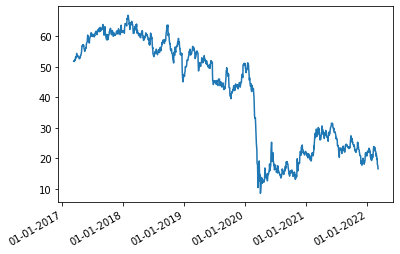

In [ ]:


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
plt.gca().xaxis.set_majo
r_locator(mdates.YearLoc
          r_locator(mdates.YearLocator())
plt.plot( stock['High']  )
plt.gcf().autofmt_xdate()

In [ ]:
stock['Future'] = stock['High'].rolling(window = 30).mean()[::-1].shift(19)
stock['Future']

Date
2022-03-08   NaN
2022-03-07   NaN
2022-03-04   NaN
2022-03-03   NaN
2022-03-02   NaN
              ..
2017-03-16   NaN
2017-03-15   NaN
2017-03-14   NaN
2017-03-13   NaN
2017-03-10   NaN
Name: Future, Length: 1258, dtype: float64

In [ ]:
stock['Return'] = stock['High'].pct_change(50).shift(-100)
features = ['High','Volume']

In [ ]:
stock_test = stock[1000: :]
stock_train = stock[0:1000:]
# first 1000 days for training and 258days for testing

In [ ]:
stock_test


,Open,High,Low,Close,Volume,Future,Return
Date,,,,,,,
2018-03-19,62.229,62.999,62.054,62.656,3753157,62.533533,-0.019750
2018-03-16,61.905,62.137,61.451,61.989,4269285,62.669000,-0.013530
2018-03-15,62.276,62.383,61.776,61.822,3141970,62.783933,-0.005233
2018-03-14,62.692,62.748,61.867,62.035,2322542,62.897200,0.012001
2018-03-13,62.731,63.273,62.481,62.600,2404535,62.973567,0.015518
...,...,...,...,...,...,...,...
2017-03-16,51.717,52.007,51.637,51.960,2403791,NaN,NaN
2017-03-15,51.519,51.960,51.383,51.807,2645671,NaN,NaN
2017-03-14,51.528,51.745,51.232,51.464,2571273,NaN,NaN


In [ ]:
x_train = stock_train[features]
x_test= stock_test[features]

y_train = np.where(stock_train.Return > 0,1,0)
y_test = np.where(stock_test.Return> 0,1,0)

In [ ]:
TC = DecisionTreeClassifier(max_depth=3,min_samples_leaf=6)
TC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [ ]:
y_pred = TC.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.70      0.72       210
           1       0.02      0.02      0.02        48

    accuracy                           0.57       258
   macro avg       0.39      0.36      0.37       258
weighted avg       0.62      0.57      0.59       258



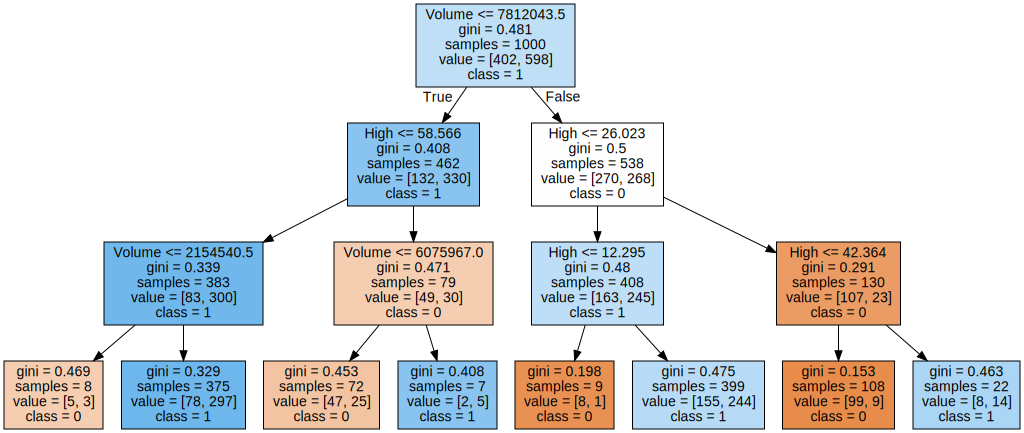

In [ ]:
from sklearn import tree 
import graphviz
data = tree.export_graphviz(TC,filled=True,feature_names=features,class_names=np.array(['0','1']))
graphviz.Source(data)

# SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime

In [ ]:
stock_svr = stock.reset_index()

In [ ]:
dates = stock_svr.index.tolist()
dates_arr = [[i]for i in dates]

In [ ]:
High = stock['High'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dates_arr, High, test_size = 0.25)

In [ ]:
lin_svr = SVR(kernel='linear')

poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)

rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)

In [ ]:
lin_svr.fit(x_train,y_train)
poly_svr.fit(x_train,y_train)
rbf_svr.fit(x_train,y_train)

SVR(C=1000.0, gamma=0.15)

In [ ]:
lin_svr_predict = lin_svr.predict(x_test)

print('Lin_svr:')
print('   r2 score: '+str(r2_score(y_test, lin_svr_predict)))
print('   RMSE : '+str(np.sqrt(mean_squared_error(y_test, lin_svr_predict))))
print("   Mean Absolute Error : " + str(mean_absolute_error(y_test, lin_svr_predict)))

Lin_svr:
   r2 score: 0.7378967140516745
   RMSE : 8.844285831953808
   Mean Absolute Error : 5.991206767109883


In [ ]:
poly_svr_predict = poly_svr.predict(x_test)

print('poly_svr:')
print('   r2 score: '+str(r2_score(y_test, poly_svr_predict)))
print('   RMSE : '+str(np.sqrt(mean_squared_error(y_test, poly_svr_predict))))
print("   Mean Absolute Error : " + str(mean_absolute_error(y_test, lin_svr_predict)))

poly_svr:
   r2 score: 0.7214921162443158
   RMSE : 9.116859954785527
   Mean Absolute Error : 5.991206767109883


In [ ]:
rbf_svr_predict = rbf_svr.predict(x_test)

print('rbf_svr:')
print('   r2 score: '+str(r2_score(y_test, rbf_svr_predict)))
print('   RMSE : '+str(np.sqrt(mean_squared_error(y_test, rbf_svr_predict))))
print("   Mean Absolute Error : " + str(mean_absolute_error(y_test, rbf_svr_predict)))

rbf_svr:
   r2 score: 0.9920005946574527
   RMSE : 1.5450957175251485
   Mean Absolute Error : 0.9676124460789944
